## Warmup for Week 4 - Naive Bayes


### Naive Bayes Exercise
**Dataset:** auto-mpg.data (provided)
I have also included the description of the dataset file (auto-mpg.names), just in case you need it.

**Objective:** Use a Naive Bayes algoritm to determine the mpg for the given dataset.

* Clean the datset as you see fit.
* A little bit of EDA goes a long way!
* Split your data into 75/25 for this exercise.
* Perform the model evaluation
* Valuate you model's accuracy
* Any interesting findings?


In [1]:
!ls

Warmup_Week4.html           auto-mpg.data
Warmup_Week4.ipynb          auto-mpg.names
Warmup_Week4_complete.ipynb


In [2]:
# pandas
import pandas as pd

# sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set() 

import warnings
warnings.filterwarnings("ignore")

#### Loading our data set

In [3]:
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
auto = pd.read_csv('auto-mpg.data', delim_whitespace=True, names=column_names)

In [4]:
auto.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


In [5]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   year          398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
auto.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


Based on the information above, we can see that we need to do something with name and horsepower.

After looking at auto-mpg.names, we can see the name is unique for every line in the dataset.  So we will drop that column.  

In [7]:
auto.drop(['name'],axis=1, inplace=True)

Now we need to figure out what going on with horsepower.

In [8]:
auto.horsepower.unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [9]:
auto[auto.horsepower == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
32,25.0,4,98.0,?,2046.0,19.0,71,1
126,21.0,6,200.0,?,2875.0,17.0,74,1
330,40.9,4,85.0,?,1835.0,17.3,80,2
336,23.6,4,140.0,?,2905.0,14.3,80,1
354,34.5,4,100.0,?,2320.0,15.8,81,2
374,23.0,4,151.0,?,3035.0,20.5,82,1


In [10]:
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')

In [11]:
# force the horsepower column to be numeric
# will change the '?' to NaN
auto.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [12]:
# drop the 6 rows that don't have a horsepower.  
# Normally we would fill them in, but that's not the focus of this exercise
auto.dropna(axis=0, inplace=True)

In [13]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


#### EDA: Looking for correlations

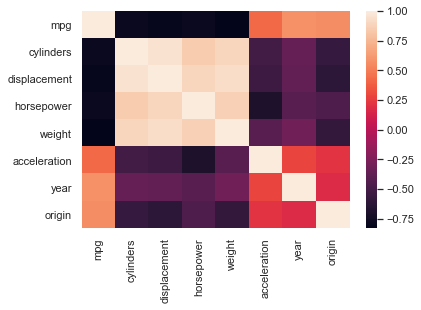

In [14]:
_ = sns.heatmap(auto.corr())

Looking at the correlatin matirx, we can see a strong correlation between mpg and four other columns. We can also see that acceleration, model.year and origin appear to have less significance to mpg.

Given this information, I'm going to set mpg as my target variable and remove acceleration, model.year and origin from the dataset.

In [15]:
# trimming our data set
auto.drop(['acceleration', 'year', 'origin'],axis=1, inplace=True)

In [16]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 18.4 KB


#### Split the dataset into training and test

In [17]:
# Split dataset in training and test datasets
X_train, X_test = train_test_split(auto, test_size=0.25, random_state=41)

In [18]:
from sklearn.naive_bayes import GaussianNB
# Instantiate the classifier
gnb = GaussianNB()

used_features =["displacement","horsepower","weight","mpg"]

In [19]:
# Train classifier
gnb.fit( X_train[used_features].values,X_train["cylinders"])

# gather the predictions
y_pred = gnb.predict(X_test[used_features])

In [20]:
gnb.score(X_train[used_features].values,X_train["cylinders"])

0.9727891156462585